# Recommendation System - Movie Recommendation
## This notebook outlines the concepts involved in building a Complete Recommendation System for recommending Movies to users
## Movie Recommender System - A very very very simple Clone of Netflix

**MovieLens dataset** and build a model to **recommend movies** to the end users. This data has been collected by the GroupLens Research Project at the University of Minnesota. 

This dataset consists of:
- **100,000 ratings** (1-5) from **943 users** on **1682 movies**
- Demographic information of the users (age, gender, occupation, etc.)

Dataset: 

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Download the dataset

In [2]:
#! wget https://raw.githubusercontent.com/subashgandyer/datasets/main/ml-100k/ml-100k.zip

In [3]:
#! unzip ml-100k.zip

### Load the dataset
### Reading users file
- u.user

- Please check the column names from the readme file
- Pass in column names for each CSV as the column name is not given in the file and read them using pandas
- Use these following columns
    - 'user_id', 'age', 'sex', 'occupation', 'zip_code'

In [4]:
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

In [5]:
users = pd.read_csv("ml-100k/u.user", sep = '|', names = user_cols)

### Display the user data

In [6]:
users.shape

(943, 5)

In [7]:
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### Reading ratings file
- u.data
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

In [8]:
ratings_col = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

In [9]:
ratings = pd.read_csv("ml-100k/u.data", sep = '\t', names = ratings_col)

### Display the Ratings data

In [10]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


### Reading items file
- u.item
- Use the following columns
    - 'movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
    - 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    - 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'

In [11]:
items_col = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

### Display the Items data

In [12]:
items = pd.read_csv("ml-100k/u.item", sep = '|', names = items_col, encoding = "latin-1")

In [13]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reading Training and Testing Ratings data
- Training
    - ua.base
- Testing
    - ua.test
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

In [18]:
ratings_col = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv("ml-100k/ua.base", sep = '\t', names = ratings_col)
ratings_test = pd.read_csv("ml-100k/ua.test", sep = '\t', names = ratings_col)

### Display the Training and Testing Ratings data

In [19]:
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

### How many unique users?

In [20]:
ratings.user_id.unique().shape

(943,)

### How many unique items / movies?

In [22]:
ratings.movie_id.unique().shape

(1682,)

### Create a User-Item Matrix
- pivot table

In [26]:
user_movies_data = ratings.pivot(index = "movie_id", columns = "user_id", values = "rating").fillna(0)

In [27]:
user_movies_data

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Content Filtering

### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [28]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
items['metadata'] = ""

In [30]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,


In [31]:
items.Action, type(items.Action)

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 1677    0
 1678    0
 1679    0
 1680    0
 1681    0
 Name: Action, Length: 1682, dtype: int64,
 pandas.core.series.Series)

In [32]:
def metadata_Action(x):
    if x == 1:
        return "Action"
    else:
        return " "

In [33]:
items['metadata_Action'] = items.Action.apply(metadata_Action)

In [34]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata,metadata_Action
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,,Action
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,,Action
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,1,0,1,0,0,,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,1,0,0,0,0,,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,,


In [35]:
def metadata_Adventure(x):
    if x == 1:
        return " Adventure "
    else:
        return " "
    
items['metadata_Adventure'] = items.Adventure.apply(metadata_Adventure)

In [36]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata,metadata_Action,metadata_Adventure
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,,,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,1,0,0,,Action,Adventure
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,1,0,0,,,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,,Action,
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,1,0,0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,,,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,1,0,1,0,0,,,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,1,0,0,0,0,,,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,,,


In [37]:
genres = ['Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [38]:
def metadata_Animation(x):
    if x == 1:
        return " Animation "
    else:
        return " "
items['metadata_Animation'] = items.Animation.apply(metadata_Animation)

In [39]:
def metadata_Childrens(x):
    if x == 1:
        return " Children's "
    else:
        return " "
    
items["metadata_Children's"] = items["Children's"].apply(metadata_Childrens)

In [40]:
def metadata_Comedy(x):
    if x == 1:
        return " Comedy "
    else:
        return " "

items['metadata_Comedy'] = items.Comedy.apply(metadata_Comedy)

In [41]:
def metadata_Crime(x):
    if x == 1:
        return " Crime "
    else:
        return " "
    
items['metadata_Crime'] = items.Crime.apply(metadata_Crime)

In [42]:
def metadata_Documentary(x):
    if x == 1:
        return " Documentary "
    else:
        return " "
    
items['metadata_Documentary'] = items.Documentary.apply(metadata_Documentary)

In [43]:
def metadata_Drama(x):
    if x == 1:
        return " Drama "
    else:
        return " "
    
items['metadata_Drama'] = items.Drama.apply(metadata_Drama)

In [44]:
def metadata_Fantasy(x):
    if x == 1:
        return " Fantasy "
    else:
        return " "
    
items['metadata_Fantasy'] = items.Fantasy.apply(metadata_Fantasy)

In [45]:
def metadata_FilmNoir(x):
    if x == 1:
        return " Film-Noir "
    else:
        return " "
    
items['metadata_Film-Noir'] = items["Film-Noir"].apply(metadata_FilmNoir)

In [46]:
def metadata_Horror(x):
    if x == 1:
        return "Horror "
    else:
        return " "

items['metadata_Horror'] = items.Horror.apply(metadata_Horror)

In [47]:
def metadata_Musical(x):
    if x == 1:
        return " Musical "
    else:
        return " "
    
items['metadata_Musical'] = items.Musical.apply(metadata_Musical)

In [48]:
def metadata_Mystery(x):
    if x == 1:
        return " Mystery "
    else:
        return " "
    
items['metadata_Mystery'] = items.Mystery.apply(metadata_Mystery)

In [49]:
def metadata_Romance(x):
    if x == 1:
        return " Romance "
    else:
        return " "
    
items['metadata_Romance'] = items.Romance.apply(metadata_Romance)

In [50]:
def metadata_SciFi(x):
    if x == 1:
        return " Sci-Fi "
    else:
        return " "
    
items['metadata_Sci-Fi'] = items["Sci-Fi"].apply(metadata_SciFi)

In [51]:
def metadata_Thriller(x):
    if x == 1:
        return " Thriller "
    else:
        return " "
    
items['metadata_Thriller'] = items.Thriller.apply(metadata_Thriller)

In [52]:
def metadata_War(x):
    if x == 1:
        return " War "
    else:
        return " "
    
items['metadata_War'] = items.War.apply(metadata_War)

In [53]:
def metadata_Western(x):
    if x == 1:
        return " Western "
    else:
        return " "
    
items['metadata_Western'] = items.Western.apply(metadata_Western)

In [54]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,metadata_Fantasy,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,,,,,,,,,,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,,,,,,,,Thriller,,
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,,,,,,,,Thriller,,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,,,,,,,,,,
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,,,,,,,,Thriller,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,,,,,,,,,,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,,,,,,Romance,,Thriller,,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,,,,,,Romance,,,,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,,,,,,,,,,


In [55]:
items['full_metadata'] = items[['metadata_Action', 'metadata_Adventure',
'metadata_Animation', 'metadata_Children\'s', 'metadata_Comedy', 'metadata_Crime', 'metadata_Documentary', 'metadata_Drama', 'metadata_Fantasy',
'metadata_Film-Noir', 'metadata_Horror', 'metadata_Musical', 'metadata_Mystery', 'metadata_Romance', 'metadata_Sci-Fi', 'metadata_Thriller', 'metadata_War', 'metadata_Western']].apply(
                                          lambda x: ' '.join(x), axis = 1)
                                
                                

In [56]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,,,,,,,,,,Animation Children's Comedy ...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,,,,,,,Thriller,,,Action Adventure ...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,,,,,,,Thriller,,,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,,,,,,,,,,Action Comedy Drama ...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,,,,,,,Thriller,,,Crime Drama Thr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,,,,,,,,,,Drama
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,,,,,Romance,,Thriller,,,Romance Thrille...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,,,,,Romance,,,,,Drama Romance
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,,,,,,,,,,Comedy


## TF-IDF Vectorizer on Metadata

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf = TfidfVectorizer()

In [59]:
tfidf_matrix = tfidf.fit_transform(items['full_metadata'])

In [60]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index = items.index.tolist())

In [61]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.00000,0.74066,0.573872,0.349419,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.536767,0.65097,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.536767,0.0,0.0
2,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0
3,0.710652,0.00000,0.00000,0.000000,0.539759,0.000000,0.0,0.451259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.000000,0.00000,0.00000,0.000000,0.000000,0.735504,0.0,0.363186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.571953,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1678,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.709050,0.0,0.705158,0.0,0.0
1679,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.533950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.845516,0.0,0.000000,0.0,0.0
1680,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [72]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 19)
latent_matrix = svd.fit_transform(tfidf_df)

In [76]:
n=20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index = items["movie title"].tolist())
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Toy Story (1995),0.101421,0.365713,-0.012251,-0.095232,-0.170593,0.025567,0.569231,0.059387,-0.162923,0.003058,0.007314,-0.368095,-0.004252,-0.190898,-0.010354,-0.002499,0.539187,-0.006726,2.727178e-33
GoldenEye (1995),0.071578,0.036596,0.799183,-0.250537,-0.181412,-0.094696,0.110338,-0.079849,-0.169315,-0.001131,-0.016618,0.404035,-0.084943,0.168878,-0.016356,-0.000576,0.058688,-0.003253,-6.605075e-32
Four Rooms (1995),0.065479,0.006783,0.642614,-0.210780,0.648298,-0.077163,0.203643,-0.213027,-0.046641,0.004582,0.034964,0.051494,-0.134826,-0.015628,0.011167,-0.022442,-0.008236,-0.000974,-1.276588e-31
Get Shorty (1995),0.597827,0.408900,0.305081,-0.257857,-0.360825,-0.095456,-0.328903,-0.020975,-0.204273,-0.010076,-0.077138,-0.123126,0.027995,-0.052028,-0.034939,0.016084,-0.002167,0.001326,-2.356313e-31
Copycat (1995),0.412884,-0.091457,0.436046,-0.190850,0.458116,-0.172868,0.093197,0.552583,0.142432,0.005693,0.038514,0.009072,-0.122488,-0.022382,0.009320,-0.057146,-0.005921,-0.006187,2.845938e-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0.952905,-0.276452,-0.100842,-0.061951,-0.016656,0.008310,-0.007396,-0.022376,-0.001224,-0.005228,-0.023113,0.005798,-0.000329,0.003018,-0.001737,0.002683,0.004624,0.000291,2.857999e-34
B. Monkey (1998),0.146393,0.129869,0.655600,0.510094,0.462658,-0.042367,0.149876,-0.140321,-0.025752,0.001176,-0.003949,0.034536,-0.098644,-0.041720,0.009244,-0.015390,-0.004650,-0.002776,-2.208080e-33
Sliding Doors (1998),0.628311,0.001548,0.187576,0.752429,-0.002328,0.018800,0.003534,-0.000146,0.007857,-0.005242,-0.046451,0.000979,-0.004433,-0.034997,0.000706,0.001952,0.003850,-0.002335,5.353978e-34
You So Crazy (1994),0.247896,0.941585,-0.125851,-0.177172,0.033586,-0.020666,-0.041557,-0.021757,0.008876,-0.002229,-0.005635,0.026440,-0.006426,0.003301,-0.006463,0.001965,0.008327,0.000608,5.462279e-34


## 2. Collaborative Filtering
- Use user_movies_data

In [63]:
from sklearn.decomposition import TruncatedSVD

In [64]:
svd = TruncatedSVD(n_components = 20)

In [67]:
latent_matrix_2 = svd.fit_transform(user_movies_data)

In [68]:
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index = items['movie title'].tolist())

In [69]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Toy Story (1995),61.469396,21.359473,-3.697657,-2.577668,22.229346,15.966689,12.776147,-2.780607,6.318672,0.410429,2.392291,-2.183715,-1.864689,-3.020838,-3.315216,-6.423488,1.623214,0.678831,-1.693636,0.118271
GoldenEye (1995),22.537180,1.719986,-13.616237,-0.514395,-6.448354,-2.409507,0.018501,-1.986322,-8.082600,-4.707631,1.282044,-2.685177,0.136807,-1.129157,-1.020366,-1.196188,-1.980063,0.435012,-1.400216,0.478369
Four Rooms (1995),12.767067,7.006772,-2.535846,-7.766739,-0.696527,-4.604232,-0.300080,-2.452041,2.603166,-3.251229,-1.330560,-1.481710,-2.876096,3.009067,-0.494286,0.085549,1.980840,1.429996,2.924896,-1.867832
Get Shorty (1995),38.407419,-3.195160,-5.761059,-6.843652,-6.047205,-6.968700,-0.934977,3.546403,-5.466456,-6.044899,1.864249,5.796186,1.839687,-4.430318,0.404182,-3.373763,4.401579,-3.225797,-2.328976,-1.223788
Copycat (1995),13.842238,3.748587,-5.764225,-2.848500,-2.476583,-4.737129,-6.222174,0.067273,2.059569,5.604659,2.167397,1.837108,8.305277,-2.171444,-0.566972,1.006093,-2.394062,0.783216,-4.182237,-2.262596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0.009730,0.054860,0.058059,0.075860,-0.094315,-0.020928,0.021518,0.002985,0.021447,-0.005712,-0.004367,0.003450,-0.007155,-0.024253,0.015712,-0.005809,0.002326,0.014578,0.046967,-0.004651
B. Monkey (1998),0.029189,0.164580,0.174176,0.227581,-0.282946,-0.062784,0.064554,0.008956,0.064340,-0.017136,-0.013100,0.010350,-0.021466,-0.072759,0.047137,-0.017428,0.006977,0.043735,0.140900,-0.013954
Sliding Doors (1998),0.019459,0.109720,0.116117,0.151721,-0.188631,-0.041856,0.043036,0.005971,0.042893,-0.011424,-0.008733,0.006900,-0.014311,-0.048506,0.031425,-0.011619,0.004651,0.029157,0.093933,-0.009303
You So Crazy (1994),0.212086,-0.025765,-0.098974,-0.012311,-0.071647,0.018814,-0.085883,0.047384,-0.171169,-0.007352,-0.095350,-0.069999,0.002097,0.066615,-0.082193,-0.241241,-0.171770,-0.145679,0.021402,0.200067


### Plot variance expalined to see what latent dimensions to use

In [70]:
explained = svd.explained_variance_ratio_.cumsum()

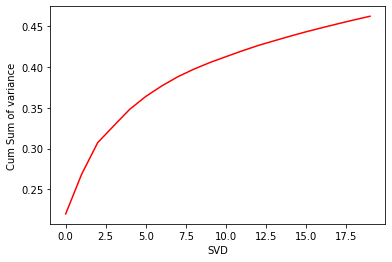

In [71]:
plt.plot(explained, color = "red")
plt.xlabel("SVD")
plt.ylabel("Cum Sum of variance")
plt.show()

### Cosine Similarity

In [81]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc["Toy Story (1995)"]).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)


# calculate the similartity of this movie with the others in the list
score_content = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_collab = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# hybrid score: an average measure of both content and collaborative 
hybrid_score = (score_content + score_collab)

# form a data frame of similar movies 
dictDF = {'content': score_content, 'collab': score_collab, 'hybrid': hybrid_score}
dictDF
similar_movies = pd.DataFrame(dictDF, index = latent_matrix_2_df.index)

#sort it on the basis of either: content, collaborative or hybrid, here : content
similar_movies.sort_values('content', ascending = False, inplace = True)
similar_movies

,content,collab,hybrid
Aladdin and the King of Thieves (1996),1.000000e+00,0.643699,1.643699
Toy Story (1995),1.000000e+00,1.000000,2.000000
"Fox and the Hound, The (1981)",9.369667e-01,0.633865,1.570832
Gumby: The Movie (1995),9.369667e-01,0.196207,1.133173
Land Before Time III: The Time of the Great Giving (1995) (V),9.369667e-01,0.507759,1.444725
...,...,...,...
"Quiet Room, The (1996)",-3.425212e-15,0.078957,0.078957
Blue Chips (1994),-3.425212e-15,0.456718,0.456718
Calendar Girl (1993),-3.425212e-15,0.260511,0.260511
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),-4.199332e-15,0.318281,0.318281


### Try Collaborative

In [82]:
similar_movies.sort_values('collab', ascending = False, inplace = True)
similar_movies

,content,collab,hybrid
Toy Story (1995),1.000000e+00,1.000000,2.000000
Willy Wonka and the Chocolate Factory (1971),5.168978e-01,0.934641,1.451539
Star Trek: First Contact (1996),1.283695e-16,0.910176,0.910176
Independence Day (ID4) (1996),-1.665335e-16,0.902761,0.902761
Return of the Jedi (1983),9.922618e-16,0.898660,0.898660
...,...,...,...
Mat' i syn (1997),-3.425212e-15,-0.058362,-0.058362
Sliding Doors (1998),8.604228e-16,-0.058362,-0.058362
"Savage Nights (Nuits fauves, Les) (1992)",-3.425212e-15,-0.066162,-0.066162
Men With Guns (1997),-1.332268e-15,-0.067666,-0.067666


## Hybrid

## 3. Hybrid Recommendation System

In [88]:
def recommend_similar_movies(title):
    
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)


# calculate the similartity of this movie with the others in the list
    score_content = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_collab = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# hybrid score: an average measure of both content and collaborative 
    hybrid_score = (score_content + score_collab)

# form a data frame of similar movies 
    dictDF = {'content': score_content, 'collab': score_collab, 'hybrid': hybrid_score}

    similar_movies = pd.DataFrame(dictDF, index = latent_matrix_2_df.index)

#sort it on the basis of either: content, collaborative or hybrid, here : content
    similar_movies.sort_values('content', ascending = False, inplace = True)
    print(similar_movies)
    
    return None

In [89]:
recommend_similar_movies("Toy Story (1995)")

                                                         content    collab  \
Aladdin and the King of Thieves (1996)              1.000000e+00  0.643699   
Toy Story (1995)                                    1.000000e+00  1.000000   
Fox and the Hound, The (1981)                       9.369667e-01  0.633865   
Gumby: The Movie (1995)                             9.369667e-01  0.196207   
Land Before Time III: The Time of the Great Giv...  9.369667e-01  0.507759   
...                                                          ...       ...   
Quiet Room, The (1996)                             -3.425212e-15  0.078957   
Blue Chips (1994)                                  -3.425212e-15  0.456718   
Calendar Girl (1993)                               -3.425212e-15  0.260511   
Shanghai Triad (Yao a yao yao dao waipo qiao) (... -4.199332e-15  0.318281   
Dead Man Walking (1995)                            -4.327701e-15  0.755617   

                                                      hybrid  


In [90]:
recommend_similar_movies("GoldenEye (1995)")

                                         content    collab    hybrid
Maximum Risk (1996)                 1.000000e+00  0.585028  1.585028
Firestorm (1998)                    1.000000e+00  0.194803  1.194803
Rock, The (1996)                    1.000000e+00  0.647666  1.647666
Twister (1996)                      1.000000e+00  0.604922  1.604922
Chain Reaction (1996)               1.000000e+00  0.661333  1.661333
...                                          ...       ...       ...
Kama Sutra: A Tale of Love (1996)  -4.508546e-15  0.439090  0.439090
Affair to Remember, An (1957)      -4.508546e-15  0.429304  0.429304
Temptress Moon (Feng Yue) (1996)   -4.508546e-15  0.116101  0.116101
Touch (1997)                       -4.508546e-15  0.345004  0.345004
French Twist (Gazon maudit) (1995) -4.649059e-15  0.324160  0.324160

[1682 rows x 3 columns]


In [91]:
recommend_similar_movies("Mission: Impossible (1996)")

                                         content    collab    hybrid
Mission: Impossible (1996)          1.000000e+00  1.000000  2.000000
Rising Sun (1993)                   7.801032e-01  0.599350  1.379454
Congo (1995)                        7.587882e-01  0.466369  1.225157
Kull the Conqueror (1997)           7.272015e-01  0.364714  1.091916
Ghost and the Darkness, The (1996)  7.272015e-01  0.867259  1.594461
...                                          ...       ...       ...
Meet Me in St. Louis (1944)        -4.996004e-16  0.300697  0.300697
Madame Butterfly (1995)            -4.996004e-16  0.286633  0.286633
Babe (1995)                        -9.575674e-16  0.621001  0.621001
Dead Man Walking (1995)            -1.283695e-15  0.655652  0.655652
Twelve Monkeys (1995)              -2.962908e-15  0.817853  0.817853

[1682 rows x 3 columns]


## Turicreate - Python Library for easy recommendation engine building

In [93]:
pip install -U pip

  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3
Note: you may need to restart the kernel to use updated packages.


### Import the library

### Create a SFrame for training and testing data

### Popularity Recommender - Cold Start problem

### Recommend some top 5 movies to users 1, 2, 3, 4, 5
- Use Popularity model

### Insights ??

- 
- 

### Item Similarity Recommender
#### Training the model

#### Making recommendations for users 1, 2, 3, 4, 5

### Insights ?
- 
- 

# 4. Matrix Factorization Recommender

- R – The user-movie rating matrix
- K – Number of latent features
- alpha – Learning rate for stochastic gradient descent
- beta – Regularization parameter for bias
- iterations – Number of iterations to perform stochastic gradient descent


In [95]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [96]:
R= np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [97]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 296.1126


KeyboardInterrupt: 

## Surprise

### Import the libraries

In [98]:
!pip install surprise

  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-win_amd64.whl size=723183 sha256=810cf44cde33443e56d8d2dac256fb22cc29bcf2791f486e76713ed0be4b2258
  Stored in directory: c:\users\sheri\appdata\local\pip\cache\wheels\76\44\74\b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [100]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [101]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [102]:
items

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,,,,,,,,,,Animation Children's Comedy ...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,,,,,,,Thriller,,,Action Adventure ...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,,,,,,,Thriller,,,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,,,,,,,,,,Action Comedy Drama ...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,,,,,,,Thriller,,,Crime Drama Thr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,,,,,,,,,,Drama
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,,,,,Romance,,Thriller,,,Romance Thrille...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,,,,,Romance,,,,,Drama Romance
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,,,,,,,,,,Comedy


In [107]:
Mapping_file = dict(zip(items['movie title'].tolist(), items['movie id'].tolist()))

### Instantiate a reader and read in our rating data

In [108]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

### Train SVD on 75% of known rates

In [109]:
trainset, testset = train_test_split(data, test_size = 0.25)

In [110]:
svd = SVD()

In [111]:
svd.fit(trainset)

In [112]:
predictions = svd.test(testset)

### Check the accuracy using Root Mean Square Error

In [113]:
accuracy.rmse(predictions)

RMSE: 0.9393


0.9392886232700897

In [118]:
def pred_user_rating(ui):
    if ui in ratings.user_id.unique():
        ui_list = ratings[ratings.user_id == ui].movie_id.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = svd.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [119]:
user_id = 1 
pred_user_rating(user_id)

,ratings
movies,
Casablanca (1942),4.910352
"Close Shave, A (1995)",4.828611
Vertigo (1958),4.701430
Schindler's List (1993),4.678763
Arsenic and Old Lace (1944),4.592144
Stand by Me (1986),4.573168
Some Folks Call It a Sling Blade (1993),4.516826
"Secret of Roan Inish, The (1994)",4.511720
"African Queen, The (1951)",4.478874


In [120]:
pred_user_rating(50)

,ratings
movies,
"Wrong Trousers, The (1993)",4.686570
"Close Shave, A (1995)",4.646313
"Bridge on the River Kwai, The (1957)",4.568141
"Third Man, The (1949)",4.566359
Wallace & Gromit: The Best of Aardman Animation (1996),4.556868
Secrets & Lies (1996),4.547140
Sunset Blvd. (1950),4.531499
Eat Drink Man Woman (1994),4.518648
Blade Runner (1982),4.517076


In [121]:
pred_user_rating(49)

,ratings
movies,
Apocalypse Now (1979),4.334291
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.250517
"Godfather, The (1972)",4.148935
Leaving Las Vegas (1995),4.106874
Chinatown (1974),4.077826
Rear Window (1954),4.035836
2001: A Space Odyssey (1968),4.020893
North by Northwest (1959),4.020065
Sunset Blvd. (1950),4.018954


In [122]:
pred_user_rating(1)

,ratings
movies,
Casablanca (1942),4.910352
"Close Shave, A (1995)",4.828611
Vertigo (1958),4.701430
Schindler's List (1993),4.678763
Arsenic and Old Lace (1944),4.592144
Stand by Me (1986),4.573168
Some Folks Call It a Sling Blade (1993),4.516826
"Secret of Roan Inish, The (1994)",4.511720
"African Queen, The (1951)",4.478874


In [123]:
pred_user_rating(915)

,ratings
movies,
"Princess Bride, The (1987)",4.315541
Schindler's List (1993),4.116897
"Shawshank Redemption, The (1994)",4.047668
Casablanca (1942),4.022875
"Godfather, The (1972)",4.016673
"Close Shave, A (1995)",3.987059
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),3.985667
Sling Blade (1996),3.972821
Raiders of the Lost Ark (1981),3.972253
